# About this file

The file `hotel_bookings.csv` contains data on hotel bookings, including information on guest demographics, booking details, and reservation status.

Column Descriptions

- **hotel**: Indicates the type of hotel (resort or city). (Categorical)
- **is_canceled**: Specifies whether the booking was canceled or not (0=not canceled, 1=canceled). (Binary)
- **lead_time**: Represents the number of days between the booking date and the arrival date. (Numerical)
- **arrival_date_year**: Denotes the year of the arrival date. (Categorical)
- **arrival_date_month**: Indicates the month of the arrival date. (Categorical)
- **arrival_date_week_number**: Specifies the week number in which guests arrived at the hotel. (Numerical)
- **arrival_date_day_of_month**: Represents a specific day of arrival within a month. (Numerical)
- **stays_in_weekend_nights**: Indicates how many nights (Saturday or Sunday) guests stayed or booked to stay at a hotel during weekends. (Numerical)
- **stays_in_week_nights**: Represents how many weeknights (Monday to Friday) guests stayed or booked to stay at a hotel during weekdays. (Numerical)
- **adults**: Indicates the number of adults included in each booking. (Numerical)
- **children**: Indicates the number of children included in each booking. (Numerical)
- **babies**: Indicates the number of babies included in each booking. (Numerical)
- **meal**: Describes what type of meal was booked (Breakfast only, Half board, Full board, or Undefined/SC – no meal package). (Categorical)
- **country**: Denotes the country-of-origin for each guest who made a reservation. (Categorical)
- **market_segment**: Shows various market segments that individuals belong to when making reservations (e.g., Online Travel Agents, Offline Travel Agents, Corporate clients). (Categorical)
- **distribution_channel**: Specifies different channels through which bookings were made (e.g., online travel agencies, direct bookings with hotels/tour operators, corporate arrangements). (Categorical)
- **is_repeated_guest**: Indicates whether the guest is a repeated visitor (0=not repeated guest, 1=repeated guest). (Binary)
- **previous_cancellations**: Represents the number of times guests previously canceled their bookings. (Numerical)
- **previous_bookings_not_canceled**: Denotes the count of previous bookings made by guests that were not canceled. (Numerical)
- **reserved_room_type**: Identifies the type of room initially reserved. (Categorical)
- **assigned_room_type**: Identifies the type of room that was assigned to guests. (Categorical)
- **booking_changes**: Represents the number of changes made to the booking. (Numerical)
- **deposit_type**: Indicates the type of deposit made for the booking. (Categorical)
- **agent**: Represents the ID of the travel agency that made the booking. (Categorical)
- **company**: Represents the ID of the company that made the booking. (Categorical)
- **days_in_waiting_list**: Represents the number of days the booking was on the waiting list before being confirmed. (Numerical)
- **customer_type**: Indicates the type of customer (e.g., transient, contract, group, or other). (Categorical)
- **adr**: Represents the average daily rate (price per room) for the booking. (Numerical)
- **required_car_parking_spaces**: Indicates the number of car parking spaces required by the guest. (Numerical)
- **total_of_special_requests**: Represents the total number of special requests made by the guest (e.g., extra bed, room amenities). (Numerical)
- **reservation_status**: Indicates the status of the reservation (e.g., canceled, checked-in, no-show). (Categorical)
- **reservation_status_date**: Represents the date on which the reservation status was last updated. (Date)

# Import Data & Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.shape

(119390, 29)

Hasil `df.shape` menunjukkan bahwa DataFrame `df` memiliki 119,390 baris dan 29 kolom. Ini berarti DataFrame tersebut terdiri dari 119,390 data (baris) dan 29 fitur (kolom).

## Descriptive statistics

In [5]:
nums = []
cats = []

for column in df :
  if df[column].dtypes in ['int64', 'float64'] :
    nums.append(column)
  else :
    cats.append(column)

num_count = len(nums)
cat_count = len(cats)

print('Number of numerical columns:', num_count)
print('Number of categorical columns:', cat_count)
print('-' * 70)
print('Numerical columns:', nums)
print('Categorical columns:', cats)

Number of numerical columns: 20
Number of categorical columns: 9
----------------------------------------------------------------------
Numerical columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']


In [6]:
list_item_u = []
for col in df.columns:
    list_item_u.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
df_desc = pd.DataFrame(data=list_item_u, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
df_desc

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,hotel,object,0,0.000000,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.000000,2,"[0, 1]"
2,lead_time,int64,0,0.000000,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.000000,3,"[2017, 2018, 2019]"
4,arrival_date_month,object,0,0.000000,12,"[September, October, November, December, January]"
5,arrival_date_week_number,int64,0,0.000000,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.000000,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.000000,17,"[0, 1, 2, 4, 3]"
8,stays_in_weekdays_nights,int64,0,0.000000,35,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.000000,14,"[2, 1, 3, 4, 40]"


Terdapat 20 kolom numerik ('nums') dan 9 kolom kategorikal ('cats') dalam DataFrame

In [7]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
df[cats].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


Dari data yang diberikan, terdapat beberapa kesimpulan dan saran perbaikan sebagai berikut:

1. **Null Values**: 
   - Kolom 'children' memiliki 4 nilai null (0.003%) dan kolom 'city' memiliki 488 nilai null (0.409%). Untuk kolom 'children', nilai null bisa didrop saja. Sedangkan untuk kolom 'city', mengisi nilai null dengan nilai yang paling sering muncul (mode).
   - Kolom 'agent' memiliki 16,340 nilai null (13.686%) dan kolom 'company' memiliki 112,593 nilai null (94.307%). Kedua kolom ini memiliki persentase nilai null yang cukup tinggi. Untuk kolom 'agent', jumlah nilai unique sebanyak 333. Hal ini membuat menggantikan missing values dengan nilai rata-rata atau median tidaklah cocok, karena hal itu dapat mengaburkan informasi yang ada dalam kolom 'agent'. Sebagai gantinya, Anda dapat melakukan drop pada baris-baris yang memiliki nilai hilang tersebut agar tidak mengganggu analisis yang akan dilakukan pada kolom 'agent'. Sedangkan untuk kolom 'company', karena persentase nilai null yang sangat tinggi, bisa dipertimbangkan untuk menghapus kolom tersebut dari analisis.

2. **Kolom dengan Nilai Tidak Normal**:
   - Kolom 'children' memiliki nilai 10.0 yang tidak masuk akal, karena jumlah anak biasanya tidak mencapai 10. Nilai ini bisa dianggap sebagai outlier dan perlu ditinjau kembali.
   - Dalam kolom adults terrdapat nilai 0, maka perlu melakukan analisis lebih lanjut dikarenakan tidak mungkin pemesanan hotel dilakukan tanpa orang dewasa, Nilai ini bisa dianggap sebagai outlier dan perlu ditinjau kembali.
   - Untuk value "Undefined" dalam kolom "meal", dapat mengganti nilai tersebut dengan nilai yang lebih bermakna atau representatif, seperti "No Meal"
   - adr' (Average Daily Rate), terdapat beberapa nilai yang mungkin tidak masuk akal, seperti nilai negatif (-6.38) dan nilai yang terlalu tinggi (misalnya 5400.0).

3. **Tipe Data yang tidak sesuai**:
   - Untuk kolom children karena merupakan data jumlah anak, jumlah anak biasanya dianggap sebagai bilangan bulat tanpa pecahan, sehingga tipe data int mungkin lebih sesuai
   - Untuk kolom agent dan company karena merupakan data ID, maka tipe data yang sesuai adalah int

## Data Preprocessing

In [9]:
df_clean = df.copy()

### Check Missing Value

In [10]:
missing_count = df_clean.isnull().sum()

# Menghitung persentase missing value pada setiap kolom
missing_percentage = (df_clean.isnull().sum() / len(df_clean)) * 100

# Menggabungkan kedua Series ke dalam DataFrame
missing_df = pd.concat([missing_count, missing_percentage], axis=1)
missing_df.columns = ['Jumlah Missing Value', 'Persentase Missing (%)']

# Menampilkan kolom-kolom yang memiliki nilai null beserta persentase missing valuenya
missing_df[missing_df['Jumlah Missing Value'] > 0]

,Jumlah Missing Value,Persentase Missing (%)
children,4,0.003350
city,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [11]:
white_space = []
for col in df_clean.columns:
    for val in df_clean[col]:
        if isinstance(val, str) and '  ' in val:
            white_space.append(val)

# Output
print(white_space)

[]


## Handling Missing Value

In [12]:
df_clean.dropna(subset=['children'], inplace=True)
df_clean['city'].fillna(df_clean['city'].mode()[0], inplace=True)
df_clean.dropna(subset=['agent'], inplace=True)
df_clean.drop('company', axis=1, inplace=True)

In [13]:
print('Apakah Masih ada nilai null?',df.isna().sum().any())

Apakah Masih ada nilai null? True


### Handling Data Type

In [14]:
df_clean['children'] = df_clean['children'].astype(int)

### Handling Incorect value 1

In [15]:
df_clean.drop(df_clean[df_clean['adr'] < 0].index, inplace=True)
df_clean.drop(df_clean[df_clean['adr'] > 5000].index, inplace=True)
df_clean.loc[(df_clean.adults <= 0, 'adults')] = 1
df_clean['meal'] = df_clean['meal'].replace(['Undefined'], 'no meal')

## Feature Extraction

In [16]:
df_eda = df_clean.copy()

Total Guest Dari kolom adults, children and babies bisa dijadikan total jumlah orang yang menginap
Total Stay Dari kolom stays_in_weekend_nights dan stays_in_weekdays_nights, bisa dijadikan total jumlah hari menginap.

In [17]:
df_eda['total_guest'] = df_eda['adults'] + df_eda['children'] + df_eda['babies']
df_eda['total_stay'] = df_eda['stays_in_weekend_nights'] + df_eda['stays_in_weekdays_nights']
df_eda.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stay
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,No Deposit,303.0,0,Personal,103.0,0,1,Check-Out,2,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,No Deposit,240.0,0,Personal,82.0,0,1,Canceled,2,3


### Handling Incorect value 2

In [18]:
df_eda.drop(index = df_eda[(df_eda['stays_in_weekend_nights'] + df_eda['stays_in_weekdays_nights']) == 0].index, inplace = True)
df_eda.drop(index = df_eda[(df_eda['adults'] + df_eda['children'] + df_eda['babies']) == 0].index, inplace = True)

In [19]:
df_eda.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stay
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,No Deposit,303.0,0,Personal,103.0,0,1,Check-Out,2,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,No Deposit,240.0,0,Personal,82.0,0,1,Canceled,2,3


# Monthly Hotel Booking Analysis Based on Hotel Type

### Proportion of Hotel Bookings by Hotel Type

In [20]:
df_hotel = df_eda.groupby(['hotel']).agg({'hotel':'count'})
df_hotel = df_hotel.div(df_hotel.sum(), axis=1).T
print('Proporsi Pemesanan Hotel Berdasarkan Jenis Hotel:')
df_hotel

Proportion of Hotel Bookings by Hotel Type:


hotel,City Hotel,Resort Hotel
hotel,0.691951,0.308049


### Monthly Hotel Booking Analysis Based on Hotel Type

In [21]:
monthly_book = df_eda.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
monthly_book.columns = ['hotel_type', 'arrival_month', 'unique_year', 'total_booking']

monthly_book['avg_booking_monthly'] = round(monthly_book['total_booking']/monthly_book['unique_year'])

monthly_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_book['month'] = monthly_book['arrival_month'].str[:3]
monthly_book['month'] = pd.Categorical(monthly_book['month'], categories=monthly_order, ordered=True)
monthly_book

,hotel_type,arrival_month,unique_year,total_booking,avg_booking_monthly,month
0,City Hotel,April,2,4152,2076.0,Apr
1,City Hotel,August,2,7153,3576.0,Aug
2,City Hotel,December,2,7023,3512.0,Dec
3,City Hotel,February,2,3642,1821.0,Feb
4,City Hotel,January,2,3483,1742.0,Jan
5,City Hotel,July,2,7173,3586.0,Jul
6,City Hotel,June,2,6853,3426.0,Jun
7,City Hotel,March,2,3083,1542.0,Mar
8,City Hotel,May,2,5715,2858.0,May
9,City Hotel,November,2,6823,3412.0,Nov


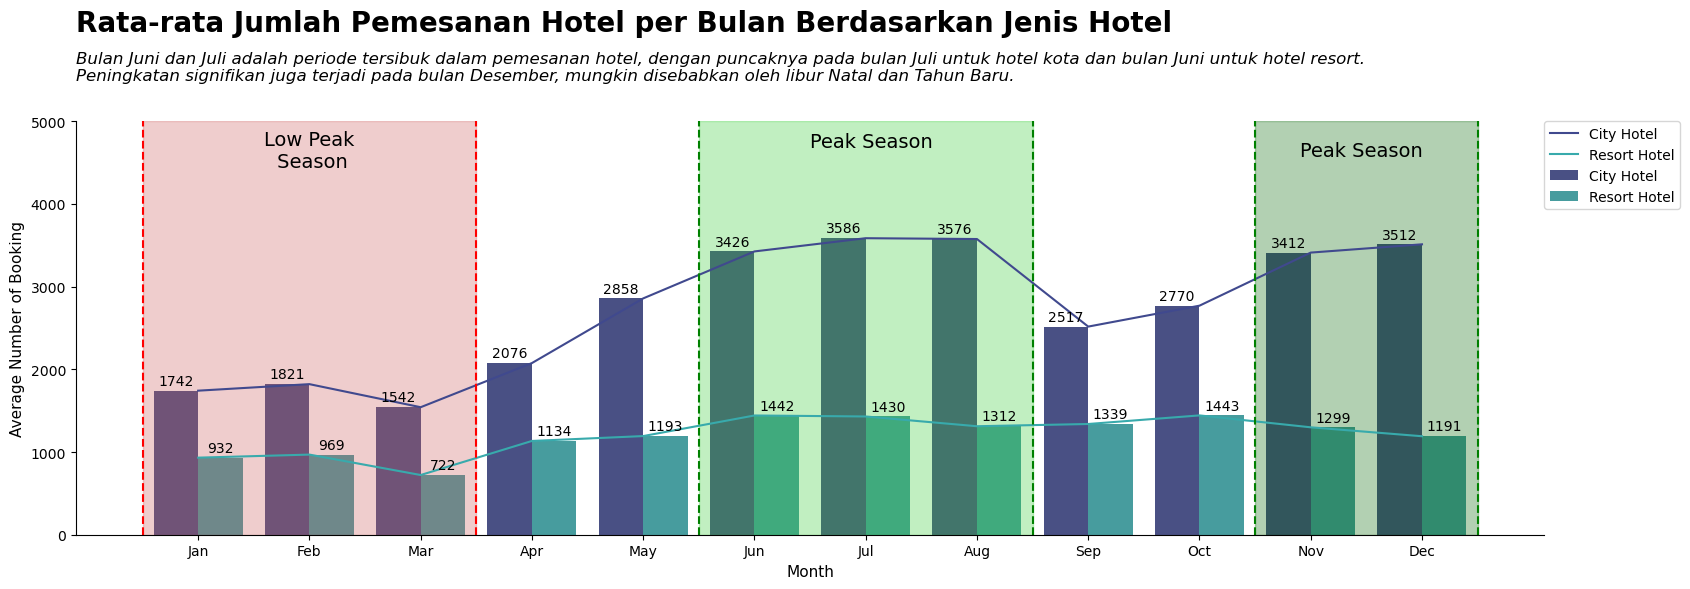

In [62]:
fig, ax = plt.subplots(figsize=(17, 6))
plt.title("Rata-rata Jumlah Pemesanan Hotel per Bulan Berdasarkan Jenis Hotel", fontsize=20, color='black', weight='bold', pad=65, loc='left')
plt.text(x=-1.1, y=5500, s="Bulan Juni dan Juli adalah periode tersibuk dalam pemesanan hotel, dengan puncaknya pada bulan Juli untuk hotel kota dan bulan Juni untuk hotel resort. \nPeningkatan signifikan juga terjadi pada bulan Desember, mungkin disebabkan oleh libur Natal dan Tahun Baru.", fontsize=12, fontstyle='italic')
sns.barplot(x='month', y ='avg_booking_monthly', data=monthly_book, hue='hotel_type', palette='mako')
sns.lineplot(x='month', y ='avg_booking_monthly', data=monthly_book, hue='hotel_type', palette='mako')


plt.xlabel('Month', fontsize=11)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,8.5), [[5000]], color='limegreen', alpha=0.3)
plt.text(x=5.5, y=4750, s='Peak Season', fontsize=14, color='black', va='center')

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5), [[5000]], color='indianred', alpha=0.3)
plt.text(x=1, y=4450, s='Low Peak\n Season', fontsize=14, color='black', ha='center')

plt.axvline(9.5, ls='--', color='green')
plt.axvline(11.5, ls='--', color='green')
plt.stackplot(np.arange(9.5,12.5), [[5000]], color='darkgreen', alpha=0.3)
plt.text(x=9.9, y=4650, s='Peak Season', fontsize=14, color='black', va='center')

sns.despine()
plt.tight_layout()
plt.show()